In [1]:
##程序采集的样本
hello_to_someone = '''
say_hello=names hello tail
names = name names | name
name = Jhon | Mike | 老梁 | 老刘
hello = 你好 | 您来啦 | 快请进
tail = 呀 | !
'''

In [2]:
import random #导入随机运算的包

In [3]:
def name():#定义一个函数
    return random.choice('Jhon | Mike | 老梁'.split('|')) #用|老进行分割  并进行随机选择

In [4]:
def hello():
    return random.choice('你好 | 您来啦 | 快请进'.split('|'))# 同上

In [5]:
def say_hello():
    return name() + ' ' + hello() #定义函数say_hello,执行name + hello函数  并将结果返回

In [6]:
say_hello() #执行say_hello函数

'Jhon   您来啦 '



进行变换



In [7]:
hello_rules = '''
say_hello=names hello tail
names = name names | name
name = Jhon | Mike | 老梁 | 老刘
hello = 你好 | 您来啦 | 快请进
tail = 呀 | !
'''

In [8]:
rules = dict() #定义一个字典

In [9]:
'add = number + number'  #这句话是什么作用呢

'add = number + number'

In [10]:
stmt_split = '='
or_split = '|'

for line in hello_rules.split('\n'): #定义变量line在hello_rules中循环,并用换行符分隔
    if not line: continue
     # skip the empty line
    stmt, expr = line.split(stmt_split) # 先用=进行分割
     # print(line)
    #print(stmt, expr) #输出的结果是hello_rules去除=号后的结果
    print(stmt, expr.split(or_split)) #输出的结果是将expr的结果封装成一个列表

    rules[stmt.strip()] = expr.split(or_split) #和上面的输出结果是等价的  

say_hello ['names hello tail']
names  [' name names ', ' name']
name  [' Jhon ', ' Mike ', ' 老梁 ', ' 老刘']
hello  [' 你好 ', ' 您来啦 ', ' 快请进']
tail  [' 呀 ', ' !']


In [11]:
rules #此时rules是一个字典

{'say_hello': ['names hello tail'],
 'names': [' name names ', ' name'],
 'name': [' Jhon ', ' Mike ', ' 老梁 ', ' 老刘'],
 'hello': [' 你好 ', ' 您来啦 ', ' 快请进'],
 'tail': [' 呀 ', ' !']}

In [12]:
rules['name']

[' Jhon ', ' Mike ', ' 老梁 ', ' 老刘']

In [13]:
rules['names']

[' name names ', ' name']

In [14]:
def generate(grammar_rule, target): #定义函数 有两个入参
    if target in grammar_rule:
        candidates = grammar_rule[target] #获取grammar_rule中的target元素,赋值给candidates
        candidate = random.choice(candidates) #在candidates中随机选择一个值赋值给candidate
        return ' '.join(generate(grammar_rule, target=c.strip()) for c in candidate.split()) #再次调用generate函数去除空格,并且递归下去
    else:
        return target #否则就返回输入的目标参数

In [15]:
#调用函数并传参
generate(rules, target='老梁')

'老梁'

In [16]:
generate(rules, target='name')

'老梁'

In [17]:
generate(rules, target='say_hello')

'老梁 您来啦 !'

In [18]:
generate(rules, target='names')

'老梁'



继续变形



In [19]:
#将许多的id规整为一个类似于模板的函数
def get_generation_by_gram(grammar_str: str, target, stmt_split='=', or_split='|'):
    rules = dict()  # key is the @statement ,value is expression

    for line in grammar_str.split('\n'):
        if not line: continue
        # skip the empty line
        stmt, expr = line.split(stmt_split)

        # print(line)
#         print(stmt, expr.split(or_split))

        rules[stmt.strip()] = expr.split(or_split)

    generated = generate(rules, target=target)
    return generated

In [20]:
def generate(grammar_rule, target):
    if target in grammar_rule:
        candidates = grammar_rule[target]
        candidate = random.choice(candidates)
        return ' '.join(generate(grammar_rule, target=c.strip()) for c in candidate.split())
    else:
        return target

In [21]:
get_generation_by_gram(hello_rules, target='say_hello')

'Jhon 你好 呀'

In [22]:

simple_grammar = '''
sentence => noun_phrase verb_phrase
verb_phrase => Article Adj* noun
Adj* => Adj | Adj Adj*
verb_phrase =>verb noun_phrase
Article => 一个 | 这个
noun => 女人 | 篮球 | 桌子 | 小猫
verb => 看着 | 坐着 | 听着 | 看见
Adj => 蓝色的 | 好看的 | 小小的
'''

In [23]:
get_generation_by_gram(simple_grammar, target='sentence',stmt_split='=>')

'noun_phrase 看着 noun_phrase'

In [24]:
simple_programming = '''
if_stmt => if ( cond ) { stmt }
cond => var op var
op => | == | < | >= | <=
stmt => assign | if_stmt
assign => var = var
var => char var | char
char => a | b | c | d 0 | 1 | 2 | 3
'''

In [25]:
for i in range(20):
    print(get_generation_by_gram(simple_programming, target='if_stmt', stmt_split='=>'))

if ( d 0 >= d 0 b 3 a ) { if ( 3 b 2 a < c ) { d 0 2 = 1 c } }
if ( 2 a b <= a 1 ) { if ( 3 d 0  1 1 ) { if ( b < c d 0 ) { if ( c < a ) { if ( b 1 == 3 3 b ) { c = a 3 } } } } }
if ( c < d 0 d 0 ) { 3 d 0 1 = d 0 b }
if ( 2  b ) { c = 3 }
if ( d 0 <= 3 1 d 0 a 1 b d 0 b 2 b ) { b 3 1 = 2 }
if ( c >= a 1 d 0 ) { 3 d 0 a c = a }
if ( 1 <= 1 ) { if ( 3 c 3 >= d 0 a c b ) { if ( c 3 c <= 1 3 ) { a 3 c = 1 3 } } }
if ( c d 0 == c ) { c = 2 }
if ( 2 3 < c 3 ) { if ( c == 1 b ) { if ( 3 == d 0 ) { if ( a a <= 3 3 ) { if ( b < c d 0 b d 0 ) { if ( 3 <= d 0 3 ) { a a = b } } } } } }
if ( b == 2 3 c d 0 ) { c = c }
if ( b 1 a c b < c a b 2 ) { if ( d 0 c d 0 <= b ) { if ( a >= b b ) { b = b } } }
if ( c c  1 ) { c 3 d 0 c = 2 }
if ( a a 3 3 >= 2 ) { if ( b  a ) { b = 1 a d 0 } }
if ( a <= 2 a ) { c = 3 2 2 }
if ( d 0 >= c ) { a 3 b = 2 2 }
if ( 2 2 == c a 1 ) { c = c c a }
if ( c c 3 a  3 ) { 3 = c }
if ( 2 2 c 2 <= b ) { if ( 2 >= c 2 ) { if ( c >= 1 ) { 3 2 c = 1 3 3 a } } }
if ( d 0 2 b c >=

In [26]:
get_generation_by_gram(simple_programming, target='if_stmt', stmt_split='=>')

'if ( 3 < 1 a ) { if ( 3 >= 1 ) { if ( d 0 b  a b b 2 a ) { 1 2 = 1 b } } }'



##Language Model

##Input: Sentence(w1)

##Output: Pribability(0-1)

$$Pr(sentence) = Pr(w_1 \cdot w_2 \cdots w_n) = \prod \frac{count(w_i,w_{i+1})}{count(w_i)}$$


In [27]:
corpus = 'C:/Users/Administrator/Desktop/article_9k.txt' #定义文件路径

In [28]:
FILE= open(corpus).read() #读取该路径下的文件

In [29]:
len(FILE)

33425826

In [30]:
FILE[:100] #读取前100个文字

'此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MI'

In [31]:
def generate_by_pro(text_corpus,length=30): #定义一个函数,随机截取目标文件的30个长度的文字
    return ''.join(random.sample(text_corpus,length))

In [32]:
generate_by_pro(FILE)

'气析在部译斯为日时国的主身三联0天印能发前c是交对育象种报人'

In [33]:
import jieba #导入jieba分词包

In [34]:
max_length = 1000000 #定义长度
sub_file=FILE[:max_length] #截取指定长度

In [35]:
def cut(string):
    return list(jieba.cut(string))

In [36]:
TOKENS = cut(sub_file)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.737 seconds.
Prefix dict has been built succesfully.


In [37]:
len(TOKENS)

532454

In [38]:
list(jieba.cut('一加手机5要做市场最轻薄'))

['一加', '手机', '5', '要', '做', '市场', '最', '轻薄']

In [39]:
import collections

In [40]:
from collections import Counter

In [41]:
%matplotlib inline

In [42]:
words_count=Counter(TOKENS) #进行词语统计

In [43]:
words_with_fre = [f for w,  f in words_count.most_common()]

In [44]:
import matplotlib.pyplot as plt

In [45]:
words_count.most_common(10)

[('的', 28764),
 ('在', 7563),
 ('了', 6529),
 ('是', 4883),
 ('和', 4245),
 ('也', 2531),
 ('月', 2433),
 ('有', 2374),
 ('将', 2114),
 ('他', 1960)]

In [46]:
words_with_fre[:10]

[28764, 7563, 6529, 4883, 4245, 2531, 2433, 2374, 2114, 1960]

In [47]:
words_with_fre[:100]

[28764,
 7563,
 6529,
 4883,
 4245,
 2531,
 2433,
 2374,
 2114,
 1960,
 1959,
 1795,
 1720,
 1699,
 1686,
 1674,
 1655,
 1601,
 1597,
 1583,
 1566,
 1530,
 1484,
 1454,
 1425,
 1385,
 1330,
 1321,
 1296,
 1196,
 1186,
 1173,
 1120,
 1117,
 1103,
 1065,
 1027,
 1018,
 1001,
 981,
 981,
 934,
 878,
 831,
 818,
 817,
 808,
 794,
 774,
 773,
 761,
 759,
 752,
 730,
 723,
 699,
 694,
 670,
 652,
 651,
 649,
 648,
 646,
 640,
 636,
 631,
 611,
 611,
 594,
 591,
 572,
 567,
 560,
 558,
 557,
 555,
 549,
 548,
 546,
 545,
 535,
 521,
 519,
 519,
 511,
 509,
 501,
 495,
 495,
 491,
 488,
 487,
 486,
 485,
 481,
 478,
 474,
 470,
 467,
 464]

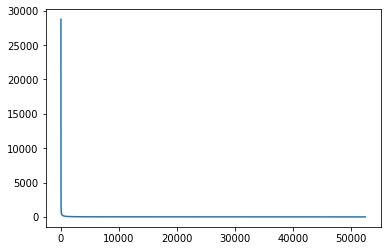

In [48]:
plt.plot(words_with_fre)

In [49]:
import numpy as np

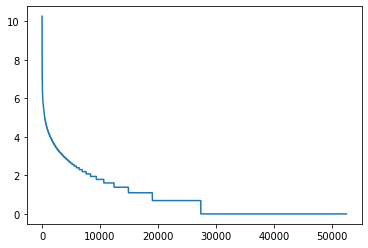

In [50]:
plt.plot(np.log(words_with_fre))

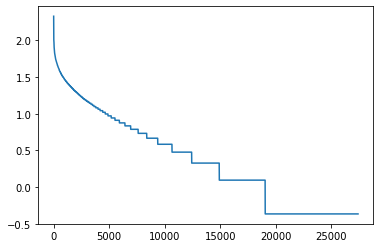

In [51]:
plt.plot(np.log(np.log(words_with_fre)))


##在大量的文本中,出现次数第二多的单词,他出现的概率是出现频率最高的单词的1/2,出现频频第三高的单词,频率是最高的单词的1/3


In [52]:
_2_gram_words =[
    TOKENS[i] + TOKENS[i+1] for i in range(len(TOKENS)-1)
]

In [53]:
_2_gram_words[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [54]:
_2_gram_words_counts =  Counter(_2_gram_words)

In [55]:
words_count.most_common()[-1][-1]

1

In [56]:
def get_1_gram_count(word):
    if word in words_count : return words_count[word]
    else:
        return words_count.most_common()[-1][-1]

In [57]:
def get_2_gram_count(word,wc):
    if  word in wc:return wc[word]
    else:
        return wc.most_common()[-1][-1]

In [58]:
def get_gram_count(word,wc):
    if word in wc : return wc[word]
    else:
        return wc.most_common()[-1][-1]

In [59]:
get_gram_count('XXXX',_2_gram_words_counts)

1

In [60]:
get_gram_count('XXXX',words_count)

1

In [61]:
def _2_gram_model(sentence):
    tokens = cut(sentence)

    probability = 1

    for i in range(len(tokens)-1):
        word = tokens[i]
        next_word = tokens[i+1]

        # pro = _2_gram_words_counts[word+next_word]/words_count[next_word]

        _two_gram_c=get_gram_count(word+next_word,_2_gram_words_counts)
        _one_gram_c= get_gram_count(next_word,words_count)

        pro = _two_gram_c/_one_gram_c

        probability *= pro
    return probability

In [62]:
_2_gram_model('前天早晨吃早饭的时候')

1.625295508274232e-08

In [63]:
get_gram_count('XXXX',_2_gram_words_counts)

1

In [64]:
_2_gram_model('此外自本周6月12日起除小米手机6等15款机型')

3.0550026391456175e-26

In [65]:
_2_gram_model('前天早晨吃晚饭的时候')

2.6004728132387704e-06

In [66]:
_2_gram_model('我请你吃火锅')

3.0458089668615984e-06

In [67]:
_2_gram_model('这个人来自清华大学')

2.102784086130036e-06

In [68]:
_2_gram_model('这个花特别好看')

1.7475796022508822e-05

In [69]:
_2_gram_model('等的我花儿都谢了')

3.041506687760986e-14


优化的方式：改进数据，或者改进模型

数据量越大，结果越好




Can you come up out 3 sceneraies which use AI methods?

1.智能语音服务 2.地图导航 3.机器客服 4.智能推荐系统

How do we use Github; Why do we use Jupyter and Pycharm;

使用git工具来使用github，或者使用小乌龟 Jupyter and Pycharm 只是开发工具 ，可以让开发人员更加专注于业务逻辑

What's the Probability Model?

概率模型又分为有参与无参方法，有参方法即最终都是做一个参数估计，一般做点估计，利用极大似然等方法进行估计，无参方法主要是核方法和近邻法，就是在一块区域里面进行概率估计，哪个类别的概率最大，那么分类的对象就属于这个类别

Can you came up with some sceneraies at which we could use Probability Model?¶

Type Markdown and LaTeX: 𝛼 2  
α2

Why do we use probability and what's the difficult points for programming based on parsing and pattern match

Type Markdown and LaTeX: 𝛼 2  
α2

What's the Language Model

语言模型最早是应用在语音识别的问题上，当然它们仍然在现代语音识别系统中发挥着核心的作用。之后，语言模型也被广泛的应用到其他的NLP任务之中。最原始的语言模型是采用参数评估技术来实现的，这个技术在很多的NLP任务中都被使用

Can you came up with some sceneraies at which we could use Language Model

Type Markdown and LaTeX: 𝛼 2  
α2

What's the 1-gram language model

n-gram是一种统计语言模型，用来根据前(n-1)个item来预测第n个item。在应用层面，这些item可以是音素（语音识别应用）、字符（输入法应用）、词（分词应用）或碱基对（基因信息）。一般来讲，可以从大规模文本或音频语料库生成n-gram模型。 习惯上，1-gram叫unigram，2-gram称为bigram，3-gram是trigram

What's the disadvantages and advantages of 1-gram language model

N-gram模型的优点在于它包含了前N-1个词所能提供的全部信息，这些词对于当前词的出现具有很强的约束力，然而它的缺点是需要相当规模的训练文本来确定模型的参数。当N很大时，模型的参数空间过大。所以常见的N值一般为1,2。还有因数据稀疏而导致的数据平滑问题，解决方法主要是使所有的N-gram概率之和为1和使所有的N-gram概率都不为0.
除此之外，与连续空间的词表示法语言学规则模型对比（例如word2vec构建出的词向量），N-gram语言模型还有以下的局限性：

N-gram模型是根据相互之间没有任何遗传属性的离散单元词而构建，从而不具备连续空间中的词向量所满足的语义上的优势：相似意义的词语具有相似的词向量，从而当系统模型针对某一词语或词序列调整参数时，相似意义的词语和词序列也会发生改变。

因此，如果在已知关键词权重非常大的情况下，使用N-gram模型或许比较合适。


What't the 2-gram models;

2-gram称为bigram，用第一个item来预测第二个item的语言模型

In [70]:
human = """
human = 自己 寻找 活动
自己 = 你 | 我 | 他 | 你们 | 我们 | 他们 | 咱们 
寻找 = 看看 | 找找 | 想找点 | 探索 | 征服 | 克服
活动 = 乐子 | 玩的 | 世界 | 未来 | 困难
"""

In [71]:
host = """
host = 寒暄 报数 询问 业务相关 结尾
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 | 您辛苦了 | 很高兴为您服务
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9
询问 = 我们不是 | 你们不是 | 大家是
业务相关 = 玩玩 具体业务
玩玩 = 耍一耍 | 玩一玩 | 看一看 | 想一想
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博 | 问题 | 世界
结尾 = 吗？"""

In [72]:
def generate1(grammar_rule, target):
    if target in grammar_rule:
        candidates = grammar_rule[target]
        candidate = random.choice(candidates)
        return ' '.join(generate(grammar_rule, target=c.strip()) for c in candidate.split())
    else:
        return target

In [73]:
#将许多的id规整为一个类似于模板的函数
def get_generation1_by_gram(grammar_str: str, target, stmt_split='=', or_split='|'):
    rules = dict()  # key is the @statement ,value is expression

    for line in grammar_str.split('\n'):
        if not line: continue
        # skip the empty line
        stmt, expr = line.split(stmt_split)

        # print(line)
#         print(stmt, expr.split(or_split))

        rules[stmt.strip()] = expr.split(or_split)

    generated = generate1(rules, target=target)
    return generated

In [74]:
get_generation1_by_gram(host, target='host',stmt_split='=')

'很高兴为您服务 我是 9 号 , 我们不是 想一想 问题 吗？'

In [75]:
get_generation1_by_gram(human, target='human',stmt_split='=')

'我 征服 困难'



编程2 ，3 题没做



In [23]:
import random

In [6]:
corpus1 = 'C:/Users/Administrator/Desktop/train.txt'



(1)在打开文本的时候,设置其编码的格式.
   如:f=open('1.txt','r',encoding='gbk')
(2)如果上一步还是不能解决,那么就是打开的1.txt文本中的一些内容超出了GBK编码的范围.可以选择使用编码更广的'gb1830',
     如:f=open('1.txt','r',encoding='gbk')
(3)还是不能解决?那么出现了超出gb1830编码的字符,在后面加个ignore属性
    如 :f=open('1.txt','r',encoding='gbk',errors='ignore')




In [17]:
FILE1= open(corpus1,'r',encoding='gbk',errors='ignore').read()


In [18]:
len(FILE1)

1410182

In [19]:
FILE1[:100]

'0 ++$++ disability-insurance ++$++ 娉曞緥瑕佹眰娈嬬柧淇濋櫓鍚楋紵 ++$++ Is  Disability  Insurance  Required  By  La'

In [24]:
def generate_by_pro1(text_corpus,length=50):
    return ''.join(random.sample(text_corpus,length))

In [25]:
generate_by_pro1(FILE1)

'紵富omH+绛浣槸r皯e櫓$+e+hr夸 ne$櫓+-+拱 a︽sae +?h +rcW9nh2lc'

In [42]:
rules1 = dict()

In [46]:
#将许多的id规整为一个类似于模板的函数
def get_generation_by_gram1(grammar_str: str, target, stmt_split='++$++', or_split='?'):
    rules1 = dict()  # key is the @statement ,value is expression

    for line in grammar_str.split('\n'):
        if not line: continue
        # skip the empty line
        stmt, expr = line.split(stmt_split)

        # print(line)
#         print(stmt, expr.split(or_split))

        #rules1[stmt.strip()] = expr.split(or_split)

    generated = generate(rules, target=target)
    return generated

In [49]:
def generate1(grammar_rule, target):
    if target in grammar_rule:
        candidates = grammar_rule[target]
        candidate = random.choice(candidates)
        return ''.join(generate(grammar_rule, target=c.strip()) for c in candidate.split())
    else:
        return target

In [48]:
get_generation_by_gram1(FILE1,target='disability')

ValueError: too many values to unpack (expected 2)



有问题：分词的时候，爆的错误如何解决




In [51]:
import jieba

In [52]:
max_length = 1000000 #定义长度
sub_file=FILE1[:max_length] #截取指定长度

In [53]:
def cut(string):
    return list(jieba.cut(string))

In [58]:
TOKENS1 = cut(sub_file)

In [55]:
import collections

In [56]:
from collections import Counter

In [57]:
%matplotlib inline

In [59]:
words_count=Counter(TOKENS1)

In [60]:
words_with_fre = [f for w,  f in words_count.most_common()]

In [61]:
import matplotlib.pyplot as plt

In [62]:
words_count.most_common(10)

[(' ', 171522),
 ('++', 54986),
 ('$', 27500),
 ('-', 9454),
 ('\n', 9164),
 ('?', 9157),
 ('insurance', 8399),
 ('Insurance', 7058),
 ('锛', 4735),
 ('紵', 4473)]

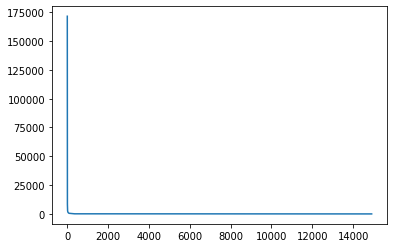

In [63]:
plt.plot(words_with_fre)

In [64]:
import numpy as np

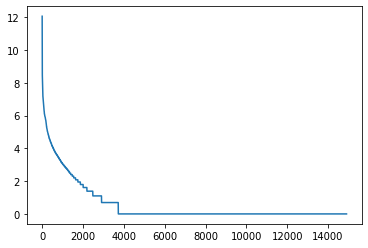

In [65]:
plt.plot(np.log(words_with_fre))

D:\OpenSources\Anaconda3\install\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


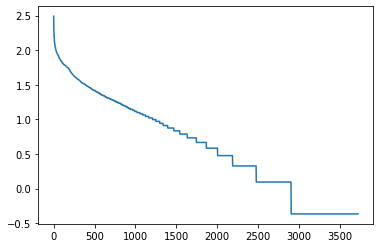

In [66]:
plt.plot(np.log(np.log(words_with_fre)))



第四题 




In [67]:
sorted([1, 3, 5, 2])

[1, 2, 3, 5]

In [69]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[0])

[(1, 4), (2, 5), (4, 4), (5, 0)]

In [70]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[1])

[(5, 0), (1, 4), (4, 4), (2, 5)]

In [71]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[1], reverse=True)

[(2, 5), (1, 4), (4, 4), (5, 0)]



 sorted 的使用方法：
 
 介绍：
 sort 是应用在 list 上的方法，sorted 可以对所有可迭代的对象进行排序操作。

list 的 sort 方法返回的是对已经存在的列表进行操作，无返回值，而内建函数 sorted 方法返回的是一个新的 list，而不是在原来的基础上进行的操作。


语法：
sorted(iterable, cmp=None, key=None, reverse=False)


    iterable -- 可迭代对象。
    cmp -- 比较的函数，这个具有两个参数，参数的值都是从可迭代对象中取出，此函数必须遵守的规则为，大于则返回1，小于则返回-1，等于则返回0。
    key -- 主要是用来进行比较的元素，只有一个参数，具体的函数的参数就是取自于可迭代对象中，指定可迭代对象中的一个元素来进行排序。
    reverse -- 排序规则，reverse = True 降序 ， reverse = False 升序（默认）。





In [72]:
a = [5,7,6,3,4,1,2]#等到一个list列表

In [73]:
b = sorted(a)#对a列表进行sorted运算

In [74]:
a #a列表不变

[5, 7, 6, 3, 4, 1, 2]

In [75]:
b #b列表进行升序

[1, 2, 3, 4, 5, 6, 7]

In [77]:
L=[('b',2),('a',1),('c',3),('d',4)]

In [78]:
sorted(L, cmp=lambda x,y:cmp(x[1],y[1]))

TypeError: 'cmp' is an invalid keyword argument for sort()


在官方文档中可以发现，在python2中的sort()函数:

sort(cmp=None, key=None, reverse=False)

python3中的sort()函数：

sort(*, key=None, reverse=None)


In [80]:
from functools import cmp_to_key

In [84]:
sorted(L, key=cmp_to_key(lambda x,y:cmp_to_key(x[1],y[1])))

TypeError: cmp_to_key() takes at most 1 argument (2 given)

In [85]:
sorted(L, key=lambda x:x[1]) 

[('a', 1), ('b', 2), ('c', 3), ('d', 4)]

In [86]:
students = [('john', 'A', 15), ('jane', 'B', 12), ('dave', 'B', 10)]

In [87]:
sorted(students, key=lambda s: s[2]) #按年龄排序

[('dave', 'B', 10), ('jane', 'B', 12), ('john', 'A', 15)]

In [88]:
sorted(students, key=lambda s: s[2], reverse=True)  #按年龄降序

[('john', 'A', 15), ('jane', 'B', 12), ('dave', 'B', 10)]



第四题编程题，实话实说：真的不会

